In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


### Read and Explore The Data

In [3]:
data = pd.read_json("Sarcasm.json", lines=True)
print(data.sample(10))

                                            article_link  \
1331   https://www.huffingtonpost.com/entry/evidence-...   
5236   https://www.huffingtonpost.com/entry/germany-m...   
21418  https://politics.theonion.com/swing-states-rou...   
9119   https://www.huffingtonpost.com/entry/thankful-...   
10710  https://politics.theonion.com/senatorial-candi...   
20503  https://www.huffingtonpost.comhttp://pubx.ch/1...   
25295  https://www.huffingtonpost.com/entry/automatic...   
16825  https://www.theonion.com/l-oreal-releases-new-...   
26668  https://www.theonion.com/poll-majority-of-amer...   
23753  https://www.huffingtonpost.com/entry/rick-perr...   

                                                headline  is_sarcastic  
1331   evidence linking alleged florida shooter to wh...             0  
5236   angela merkel will seek fourth term as german ...             0  
21418  swing states roughed up by bush, kerry operatives             1  
9119   thankful for our power: a thankful disco

Text(0.5, 1.0, 'Distribution of Sarcastic and Non-Sarcastic Articles')

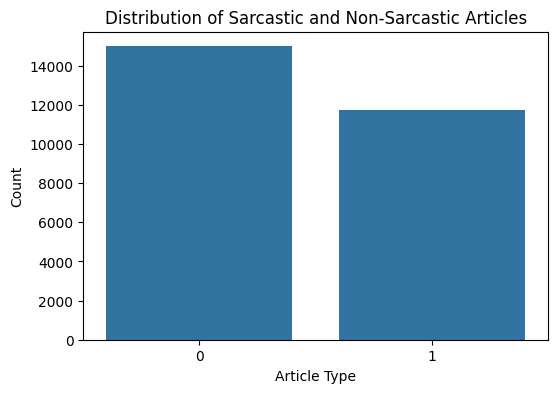

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x="is_sarcastic", data=data)
plt.xlabel("Article Type")
plt.ylabel("Count")
plt.title("Distribution of Sarcastic and Non-Sarcastic Articles")


### DT Algorithm

In [5]:
cv = CountVectorizer()
x = cv.fit_transform(data["headline"])
y = data["is_sarcastic"]

In [6]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
Model = DecisionTreeClassifier(max_depth=10)
Model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [8]:
y_pred = Model.predict(x_test)

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6845750655185324
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.51      0.65      3004
           1       0.59      0.91      0.72      2338

    accuracy                           0.68      5342
   macro avg       0.73      0.71      0.68      5342
weighted avg       0.75      0.68      0.68      5342



In [10]:
text = input("Enter a Text: ")
pre = cv.transform([text])
print(Model.predict(pre))

[0]
